In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invweibull
from statsmodels.distributions.empirical_distribution import ECDF
import datetime

In [80]:
# load the data

#pd.set_option('display.max_rows', None)

rate_df = pd.read_csv("C:/Users/severusbot/Documents/AMS_517/Frechet_Model/EUR_USD.csv")

rate_df = rate_df[['Date', 'Open', 'Price']]
rate_df['Date'] = pd.to_datetime(rate_df['Date'])
rate_df['Loss'] = rate_df['Price'] - rate_df['Open']
rate_df = rate_df[['Date', 'Loss']]

# find the max loss of each hour

rate_df.set_index('Date', inplace = True)

maxloss_df = rate_df.resample('W').max().dropna()
#display(rate_df)

# check for NaN

maxloss_df.isnull().values.any()



False

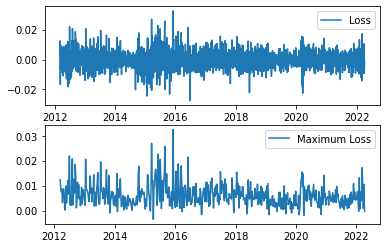

In [81]:
# plot loss data

fig,ax = plt.subplots(2,1)


ax[0].plot(rate_df['Loss'], label = 'Loss')
ax[1].plot(maxloss_df['Loss'], label = 'Maximum Loss')
ax[0].legend()
ax[1].legend()

In [92]:
# fit the frechet distribution

global_shape,global_loc,global_scale=invweibull.fit(maxloss_df['Loss'])
global_shape,global_loc,global_scale


(135.52786579562013, -0.46920644418648666, 0.47337882170741963)

No handles with labels found to put in legend.


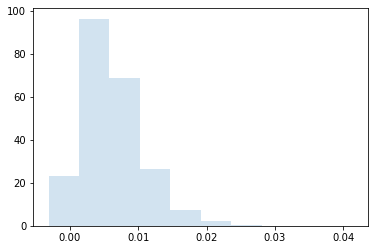

In [93]:
r = invweibull.rvs(global_shape,loc=global_loc,scale=global_scale, size=10000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.show()

(array([10.01475859, 78.0096985 , 98.03921569, 57.45308876, 20.02951718,
         7.90638836,  3.6896479 ,  1.05418511,  1.05418511,  0.52709256]),
 array([-0.0035,  0.0001,  0.0037,  0.0073,  0.0109,  0.0145,  0.0181,
         0.0217,  0.0253,  0.0289,  0.0325]),
 [<matplotlib.patches.Polygon at 0x1ed052d2460>])

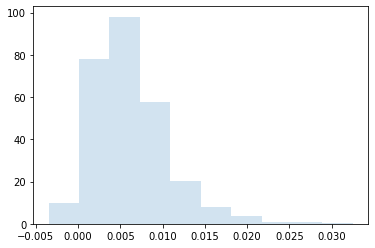

In [95]:
plt.hist(maxloss_df['Loss'], density=True, histtype='stepfilled', alpha=0.2)

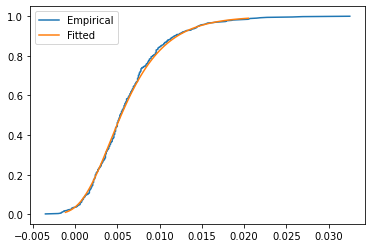

In [101]:
### Comparing Static distributions

ecdf=ECDF(maxloss_df['Loss'])
plt.plot(ecdf.x,ecdf.y,label='Empirical')

n=100
x = np.linspace(invweibull.ppf(0.01, global_shape,loc=global_loc,scale=global_scale),
                invweibull.ppf(0.99, global_shape,loc=global_loc,scale=global_scale), n)
frechet_cdf=invweibull.cdf(x,global_shape,loc=global_loc,scale=global_scale)
plt.plot(x,frechet_cdf,label='Fitted')
plt.legend()